In [1]:

# Data cleaning

import pandas as pd 
from numpy import random 

# read in excel file 
df = pd.read_excel(r'csi_data.xlsx')

mapping = {
    'Be creative and expressive': 1, 
    'Become immersed in the activity': 2, 
    'Enjoy using the system or tool': 3, 
    'Explore many different ideas, outcomes, or possibilities': 4, 
    'Produce results that are worth the effort I put in': 5, 
    'Work with other people': 6
}

df.applymap(lambda s: mapping.get(s) if s in mapping else s)

enjoyment = df.iloc[:, 18:20]
exploration = df.iloc[:, 20:22]
expressiveness = df.iloc[:, 22:24]
immersion = df.iloc[:, 24:26]
effort = df.iloc[:, 26:28]

In [2]:

# Calculating the creativity support index (CSi)

count_data = []
for i in range(len(df)): 
    counts = [0, 0, 0, 0, 0]
    for j in range(9): 
        for factor in range(5): 
            if (df.iloc[i][28 + j] == factor + 1): 
                counts[factor] += 1
    count_data.append(counts)

print(count_data)
factor_count = pd.DataFrame(count_data, columns=['enjoyment_count', 'exploration_count', 'expressiveness_count', 'immersion_count', 'effort_count']); 
df = pd.concat([df, factor_count], axis=1); 

csi_list = []
csi_list_grouped = [[], [], []] 
for i in range(len(df)): 
    csi = 0 
    for j in range(5): 
        csi += (df.iloc[i][18 + j] + df.iloc[i][18 + j + 1]) * df.iloc[i][38 + j]
    csi = csi / 3
    csi_list.append(csi)
    csi_list_grouped[df.iloc[i]['group'] - 1].append(csi)

df['csi'] = csi_list

df.to_excel('restult.xlsx')


[[3, 1, 0, 3, 2], [3, 2, 1, 3, 0], [3, 1, 0, 1, 4], [3, 0, 1, 3, 2], [4, 2, 0, 2, 1], [3, 0, 1, 3, 2], [3, 1, 0, 3, 2], [2, 0, 1, 3, 3], [3, 0, 1, 3, 2], [2, 2, 2, 3, 0], [4, 2, 0, 2, 1], [3, 2, 3, 1, 0], [3, 1, 2, 3, 0], [3, 2, 0, 3, 1], [2, 3, 0, 3, 1], [1, 0, 2, 3, 3], [3, 2, 1, 3, 0], [4, 2, 2, 1, 0], [2, 0, 1, 2, 4], [4, 2, 0, 2, 1], [2, 3, 0, 3, 1], [3, 1, 0, 3, 2], [2, 2, 0, 3, 2], [3, 1, 2, 3, 0]]


[32.625, 29.541666666666664, 38.5]
[10.860782532682544, 11.562556306169208, 10.109126789413834]


[Text(0.5, 0, 'group'), Text(0, 0.5, 'CSI score')]

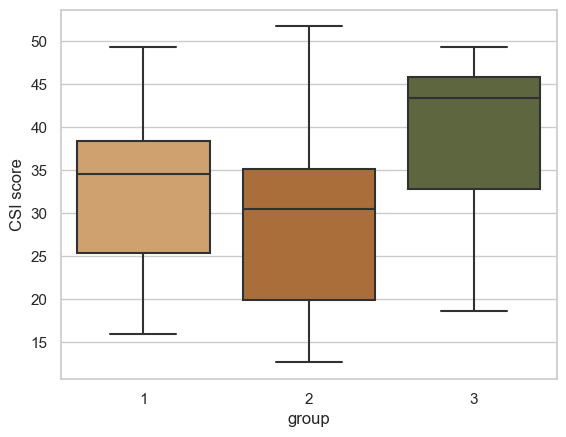

In [18]:
# visualising the means of the groups

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

means = []
stds = [] 
for idx in range(len(csi_list_grouped)):
    means.append(np.mean(csi_list_grouped[idx]))
    stds.append(np.std(csi_list_grouped[idx]))

print(means)
print(stds)

# sns.rc('text', color='#fcfcf8')
# sns.rc('axes', labelcolor='#fcfcf8')
# sns.rc('xtick', color='#fcfcf8')
# sns.rc('ytick', color='#fcfcf8')


sns.set(rc={'axes.facecolor':'#fcfcf8', 'figure.facecolor':'#fcfcf8'})
sns.set_style("whitegrid")
colors = ['#dea25e', '#bc6c29', '#616d38']
sns.set_palette( colors )
ax = sns.boxplot(x='group', y='csi', data=df)
ax.set(xlabel='group', ylabel='CSI score')


In [4]:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(csi_list_grouped[0], csi_list_grouped[1], csi_list_grouped[2])
print(fvalue, pvalue)
print(csi_list_grouped)

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('csi ~ C(group)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

# conclusion, no significant differences between the CSI 

1.229243329702572 0.312717857227321
[[18.333333333333332, 27.666666666666668, 33.666666666666664, 44.333333333333336, 16.0, 35.333333333333336, 49.333333333333336, 36.333333333333336], [18.666666666666668, 34.333333333333336, 20.333333333333332, 31.333333333333332, 51.666666666666664, 37.666666666666664, 12.666666666666666, 29.666666666666668], [45.666666666666664, 45.0, 18.666666666666668, 34.666666666666664, 49.333333333333336, 27.0, 46.0, 41.666666666666664]]


,sum_sq,df,F,PR(>F)
C(group),331.398148,2.0,1.229243,0.312718
Residual,2830.750000,21.0,NaN,NaN
